Christian Arendt Rasmussen s144466, Frederikke Lehmann s154109 & Clara Foss s154312

# Project - Prediction of top Spotify tracks

### Research question
How can audio features be used to predict the popularity of a track?

In [282]:
import pystan
import pystan_utils
import pandas as pd
from pandas import *
from pylab import *
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import spotipy
import random
import math

In [214]:
data = pd.read_csv("toptracks17.csv") 
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


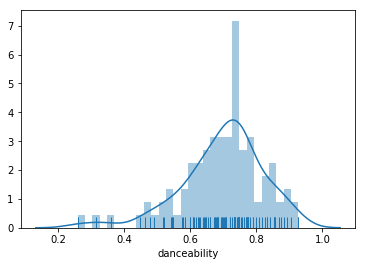

In [215]:
sns.distplot(data['danceability'], kde=True, rug=True, bins = 30);

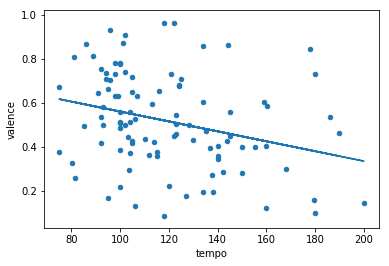

In [216]:
data.plot(kind="scatter", x="tempo", y="valence")
(x, y) = polyfit(data['tempo'], data['valence'], 1)
yp = polyval([x, y], data['tempo'])
plot(data['tempo'], yp)

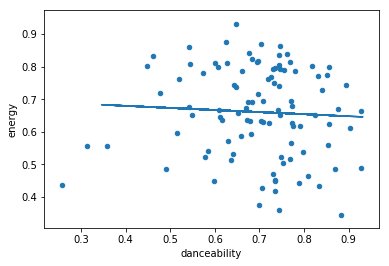

In [217]:
data.plot(kind="scatter", x="danceability", y="energy")
(x, y) = polyfit(data['danceability'], data['energy'], 1)
yp = polyval([x, y], data['energy'])
plot(data['energy'], yp)

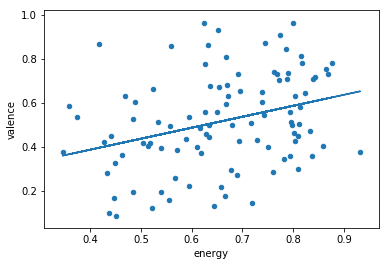

In [218]:
data.plot(kind="scatter", x="energy", y="valence")
(x, y) = polyfit(data['energy'], data['valence'], 1)
yp = polyval([x, y], data['energy'])
plot(data['energy'], yp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D7E3B2C88>,
      dtype=object)

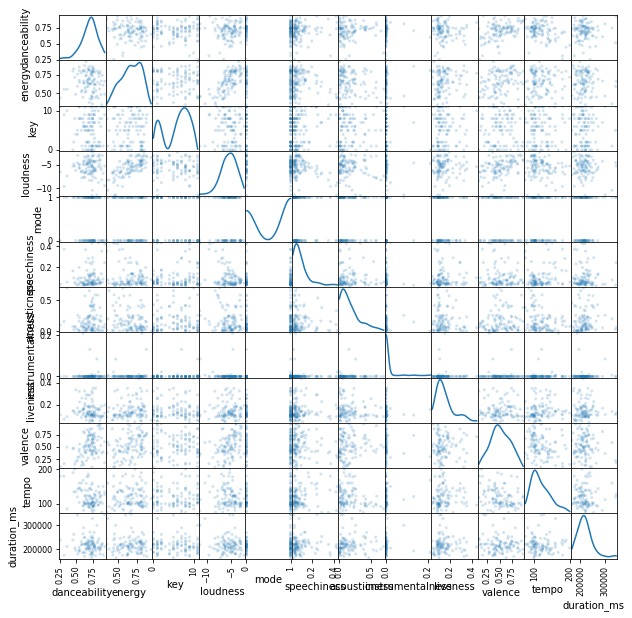

In [219]:
df = pd.DataFrame(data, columns = data.columns[3:-1])
scatter_matrix(df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde')

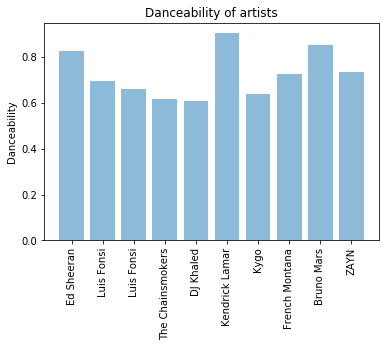

In [220]:
top10 = data[0:10]
objects = top10['artists']
y_pos = np.arange(len(objects))
performance = top10['danceability']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Danceability')
plt.title('Danceability of artists')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'tempo')

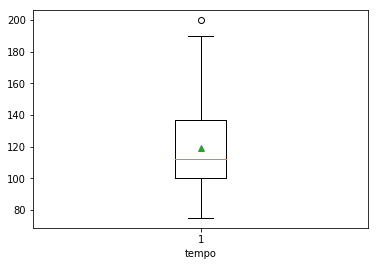

In [221]:
plt.boxplot(data['tempo'], showmeans=True)
plt.xlabel('tempo')

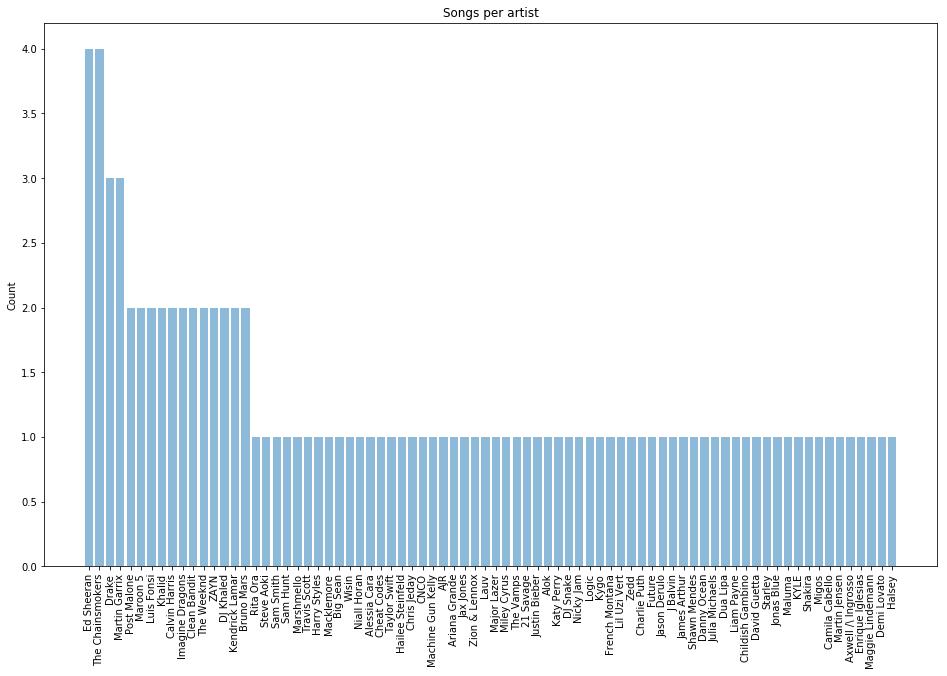

In [287]:
artists = data['artists']
dict = {}
for x in artists: 
    if x not in dict: 
        dict[x] = 1
    else:
        dict[x] += 1
        
artList = list(dict.keys())
freqList = list(dict.values())
artistfreq = DataFrame({'artists' : artList, 'frequency' : freqList} )
artistfreq.head()
artfreq = artistfreq.sort_values('frequency',ascending=False)
objects = artfreq['artists']
y_pos = np.arange(len(objects))
performance = artfreq['frequency']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.rcParams['figure.figsize'] = (16, 10)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Songs per artist')
plt.xticks(rotation=90)
plt.show()

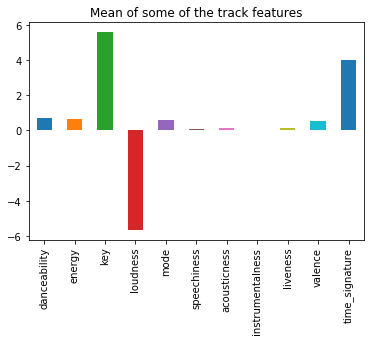

danceability        0.696820
energy              0.660690
key                 5.570000
loudness           -5.652650
mode                0.580000
speechiness         0.103969
acousticness        0.166306
instrumentalness    0.004796
liveness            0.150607
valence             0.517049
time_signature      3.990000
dtype: float64


In [278]:
df = data.drop(['id','name','artists','duration_ms','tempo'], axis=1)
df.mean().plot.bar()
plt.title('Mean of some of the track features')
plt.show()
print(df.mean())

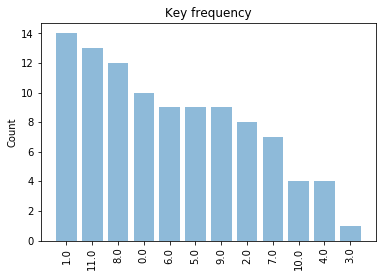

In [191]:
keys = data['key']
dict = {}
for x in keys: 
    if x not in dict: 
        dict[x] = 1
    else:
        dict[x] += 1
        
keyList = list(dict.keys())
keyfreq = list(dict.values())
keyfrequency = DataFrame({'keys' : keyList, 'frequency' : keyfreq} )
keyfrequency.head()

keyfreq = keyfrequency.sort_values('frequency',ascending=False)
objects = keyfreq['keys']
y_pos = np.arange(len(objects))
performance = keyfreq['frequency']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Key frequency')
plt.xticks(rotation=90)
plt.show()

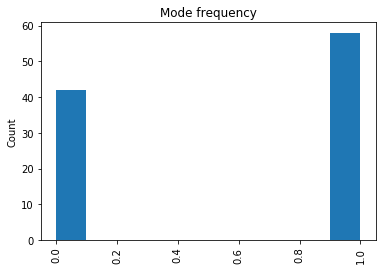

In [273]:
plt.hist(data['mode'])
plt.ylabel('Count')
plt.title('Mode frequency')
plt.xticks(rotation=90)
plt.show()